#Communities and Crime Unnormalized Data Set


The dataset contains 2215 observations in 147 columns. Each record corresponds to a different community within United States. In addition to the Community Name, and State, there are columns for county and community codes. 

The rest of the data has numeric values representinting various demographic descriptions of each community.


Source: https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized#

### I would like to research the rate of total number of violent crimes per 100K popuation

In [2]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from urllib.request import urlretrieve



In [29]:
dataDict = {"communityname":"Community name - not predictive - for information only (string)",
"state":"US state (by 2 letter postal abbreviation)(nominal)",
"countyCode":"numeric code for county - not predictive, and many missing values (numeric)",
"communityCode":"numeric code for community - not predictive and many missing values (numeric)",
"fold":"fold number for non-random 10 fold cross validation, potentially useful for debugging, paired tests - not predictive (numeric - integer)",
"population":"population for community (numeric - expected to be integer)",
"householdsize":"mean people per household (numeric - decimal)",
"racepctblack":"percentage of population that is african american (numeric - decimal)",
"racePctWhite":"percentage of population that is caucasian (numeric - decimal)",
"racePctAsian":"percentage of population that is of asian heritage (numeric - decimal)",
"racePctHisp":"percentage of population that is of hispanic heritage (numeric - decimal)",
"agePct12t21":"percentage of population that is 12-21 in age (numeric - decimal)",
"agePct12t29":"percentage of population that is 12-29 in age (numeric - decimal)",
"agePct16t24":"percentage of population that is 16-24 in age (numeric - decimal)",
"agePct65up":"percentage of population that is 65 and over in age (numeric - decimal)",
"numbUrban":"number of people living in areas classified as urban (numeric - expected to be integer)",
"pctUrban":"percentage of people living in areas classified as urban (numeric - decimal)",
"medIncome":"median household income (numeric - may be integer)",
"pctWWage":"percentage of households with wage or salary income in 1989 (numeric - decimal)",
"pctWFarmSelf":"percentage of households with farm or self employment income in 1989 (numeric - decimal)",
"pctWInvInc":"percentage of households with investment / rent income in 1989 (numeric - decimal)",
"pctWSocSec":"percentage of households with social security income in 1989 (numeric - decimal)",
"pctWPubAsst":"percentage of households with public assistance income in 1989 (numeric - decimal)",
"pctWRetire":"percentage of households with retirement income in 1989 (numeric - decimal)",
"medFamInc":"median family income (differs from household income for non-family households) (numeric - may be integer)",
"perCapInc":"per capita income (numeric - decimal)",
"whitePerCap":"per capita income for caucasians (numeric - decimal)",
"blackPerCap":"per capita income for african americans (numeric - decimal)",
"indianPerCap":"per capita income for native americans (numeric - decimal)",
"AsianPerCap":"per capita income for people with asian heritage (numeric - decimal)",
"OtherPerCap":"per capita income for people with 'other' heritage (numeric - decimal)",
"HispPerCap":"per capita income for people with hispanic heritage (numeric - decimal)",
"NumUnderPov":"number of people under the poverty level (numeric - expected to be integer)",
"PctPopUnderPov":"percentage of people under the poverty level (numeric - decimal)",
"PctLess9thGrade":"percentage of people 25 and over with less than a 9th grade education (numeric - decimal)",
"PctNotHSGrad":"percentage of people 25 and over that are not high school graduates (numeric - decimal)",
"PctBSorMore":"percentage of people 25 and over with a bachelors degree or higher education (numeric - decimal)",
"PctUnemployed":"percentage of people 16 and over, in the labor force, and unemployed (numeric - decimal)",
"PctEmploy":"percentage of people 16 and over who are employed (numeric - decimal)",
"PctEmplManu":"percentage of people 16 and over who are employed in manufacturing (numeric - decimal)",
"PctEmplProfServ":"percentage of people 16 and over who are employed in professional services (numeric - decimal)",
"PctOccupManu":"percentage of people 16 and over who are employed in manufacturing (numeric - decimal) #### No longer sure of difference from PctEmplManu - may include unemployed manufacturing workers ####",
"PctOccupMgmtProf":"percentage of people 16 and over who are employed in management or professional occupations (numeric - decimal)",
"MalePctDivorce":"percentage of males who are divorced (numeric - decimal)",
"MalePctNevMarr":"percentage of males who have never married (numeric - decimal)",
"FemalePctDiv":"percentage of females who are divorced (numeric - decimal)",
"TotalPctDiv":"percentage of population who are divorced (numeric - decimal)",
"PersPerFam":"mean number of people per family (numeric - decimal)",
"PctFam2Par":"percentage of families (with kids) that are headed by two parents (numeric - decimal)",
"PctKids2Par":"percentage of kids in family housing with two parents (numeric - decimal)",
"PctYoungKids2Par":"percent of kids 4 and under in two parent households (numeric - decimal)",
"PctTeen2Par":"percent of kids age 12-17 in two parent households (numeric - decimal)",
"PctWorkMomYoungKids":"percentage of moms of kids 6 and under in labor force (numeric - decimal)",
"PctWorkMom":"percentage of moms of kids under 18 in labor force (numeric - decimal)",
"NumKidsBornNeverMar":"number of kids born to never married (numeric - expected to be integer)",
"PctKidsBornNeverMar":"percentage of kids born to never married (numeric - decimal)",
"NumImmig":"total number of people known to be foreign born (numeric - expected to be integer)",
"PctImmigRecent":"percentage of _immigrants_ who immigated within last 3 years (numeric - decimal)",
"PctImmigRec5":"percentage of _immigrants_ who immigated within last 5 years (numeric - decimal)",
"PctImmigRec8":"percentage of _immigrants_ who immigated within last 8 years (numeric - decimal)",
"PctImmigRec10":"percentage of _immigrants_ who immigated within last 10 years (numeric - decimal)",
"PctRecentImmig":"percent of _population_ who have immigrated within the last 3 years (numeric - decimal)",
"PctRecImmig5":"percent of _population_ who have immigrated within the last 5 years (numeric - decimal)",
"PctRecImmig8":"percent of _population_ who have immigrated within the last 8 years (numeric - decimal)",
"PctRecImmig10":"percent of _population_ who have immigrated within the last 10 years (numeric - decimal)",
"PctSpeakEnglOnly":"percent of people who speak only English (numeric - decimal)",
"PctNotSpeakEnglWell":"percent of people who do not speak English well (numeric - decimal)",
"PctLargHouseFam":"percent of family households that are large (6 or more) (numeric - decimal)",
"PctLargHouseOccup":"percent of all occupied households that are large (6 or more people) (numeric - decimal)",
"PersPerOccupHous":"mean persons per household (numeric - decimal)",
"PersPerOwnOccHous":"mean persons per owner occupied household (numeric - decimal)",
"PersPerRentOccHous":"mean persons per rental household (numeric - decimal)",
"PctPersOwnOccup":"percent of people in owner occupied households (numeric - decimal)",
"PctPersDenseHous":"percent of persons in dense housing (more than 1 person per room) (numeric - decimal)",
"PctHousLess3BR":"percent of housing units with less than 3 bedrooms (numeric - decimal)",
"MedNumBR":"median number of bedrooms (numeric - decimal)",
"HousVacant":"number of vacant households (numeric - expected to be integer)",
"PctHousOccup":"percent of housing occupied (numeric - decimal)",
"PctHousOwnOcc":"percent of households owner occupied (numeric - decimal)",
"PctVacantBoarded":"percent of vacant housing that is boarded up (numeric - decimal)",
"PctVacMore6Mos":"percent of vacant housing that has been vacant more than 6 months (numeric - decimal)",
"MedYrHousBuilt":"median year housing units built (numeric - may be integer)",
"PctHousNoPhone":"percent of occupied housing units without phone (in 1990, this was rare!) (numeric - decimal)",
"PctWOFullPlumb":"percent of housing without complete plumbing facilities (numeric - decimal)",
"OwnOccLowQuart":"owner occupied housing - lower quartile value (numeric - decimal)",
"OwnOccMedVal":"owner occupied housing - median value (numeric - decimal)",
"OwnOccHiQuart":"owner occupied housing - upper quartile value (numeric - decimal)",
"OwnOccQrange":"owner occupied housing - difference between upper quartile and lower quartile values (numeric - decimal)",
"RentLowQ":"rental housing - lower quartile rent (numeric - decimal)",
"RentMedian":"rental housing - median rent (Census variable H32B from file STF1A) (numeric - decimal)",
"RentHighQ":"rental housing - upper quartile rent (numeric - decimal)",
"RentQrange":"rental housing - difference between upper quartile and lower quartile rent (numeric - decimal)",
"MedRent":"median gross rent (Census variable H43A from file STF3A - includes utilities) (numeric - decimal)",
"MedRentPctHousInc":"median gross rent as a percentage of household income (numeric - decimal)",
"MedOwnCostPctInc":"median owners cost as a percentage of household income - for owners with a mortgage (numeric - decimal)",
"MedOwnCostPctIncNoMtg":"median owners cost as a percentage of household income - for owners without a mortgage (numeric - decimal)",
"NumInShelters":"number of people in homeless shelters (numeric - expected to be integer)",
"NumStreet":"number of homeless people counted in the street (numeric - expected to be integer)",
"PctForeignBorn":"percent of people foreign born (numeric - decimal)",
"PctBornSameState":"percent of people born in the same state as currently living (numeric - decimal)",
"PctSameHouse85":"percent of people living in the same house as in 1985 (5 years before) (numeric - decimal)",
"PctSameCity85":"percent of people living in the same city as in 1985 (5 years before) (numeric - decimal)",
"PctSameState85":"percent of people living in the same state as in 1985 (5 years before) (numeric - decimal)",
"LemasSwornFT":"number of sworn full time police officers (numeric - expected to be integer)",
"LemasSwFTPerPop":"sworn full time police officers per 100K population (numeric - decimal)",
"LemasSwFTFieldOps":"number of sworn full time police officers in field operations (on the street as opposed to administrative etc) (numeric - expected to be integer)",
"LemasSwFTFieldPerPop":"sworn full time police officers in field operations (on the street as opposed to administrative etc) per 100K population (numeric - decimal)",
"LemasTotalReq":"total requests for police (numeric - expected to be integer)",
"LemasTotReqPerPop":"total requests for police per 100K popuation (numeric - decimal)",
"PolicReqPerOffic":"total requests for police per police officer (numeric - decimal)",
"PolicPerPop":"police officers per 100K population (numeric - decimal)",
"RacialMatchCommPol":"a measure of the racial match between the community and the police force. High values indicate proportions in community and police force are similar (numeric - decimal)",
"PctPolicWhite":"percent of police that are caucasian (numeric - decimal)",
"PctPolicBlack":"percent of police that are african american (numeric - decimal)",
"PctPolicHisp":"percent of police that are hispanic (numeric - decimal)",
"PctPolicAsian":"percent of police that are asian (numeric - decimal)",
"PctPolicMinor":"percent of police that are minority of any kind (numeric - decimal)",
"OfficAssgnDrugUnits":"number of officers assigned to special drug units (numeric - expected to be integer)",
"NumKindsDrugsSeiz":"number of different kinds of drugs seized (numeric - expected to be integer)",
"PolicAveOTWorked":"police average overtime worked (numeric - decimal)",
"LandArea":"land area in square miles (numeric - decimal)",
"PopDens":"population density in persons per square mile (numeric - decimal)",
"PctUsePubTrans":"percent of people using public transit for commuting (numeric - decimal)",
"PolicCars":"number of police cars (numeric - expected to be integer)",
"PolicOperBudg":"police operating budget (numeric - may be integer)",
"LemasPctPolicOnPatr":"percent of sworn full time police officers on patrol (numeric - decimal)",
"LemasGangUnitDeploy":"gang unit deployed (numeric - integer - but really nominal - 0 means NO, 10 means YES, 5 means Part Time)",
"LemasPctOfficDrugUn":"percent of officers assigned to drug units (numeric - decimal)",
"PolicBudgPerPop":"police operating budget per population (numeric - decimal)",
"murders":"number of murders in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)",
"murdPerPop":"number of murders per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)",
"rapes":"number of rapes in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)",
"rapesPerPop":"number of rapes per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)",
"robberies":"number of robberies in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)",
"robbbPerPop":"number of robberies per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)",
"assaults":"number of assaults in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)",
"assaultPerPop":"number of assaults per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)",
"burglaries":"number of burglaries in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)",
"burglPerPop":"number of burglaries per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)",
"larcenies":"number of larcenies in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)",
"larcPerPop":"number of larcenies per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)",
"autoTheft":"number of auto thefts in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)",
"autoTheftPerPop":"number of auto thefts per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)",
"arsons":"number of arsons in 1995 (numeric - expected to be integer) potential GOAL attribute (to be predicted)",
"arsonsPerPop":"number of arsons per 100K population (numeric - decimal) potential GOAL attribute (to be predicted)",
"ViolentCrimesPerPop":"total number of violent crimes per 100K popuation (numeric - decimal) GOAL attribute (to be predicted)",
"nonViolPerPop":"total number of non-violent crimes per 100K popuation (numeric - decimal) potential GOAL attribute (to be predicted)"}



dict

In [52]:
dfColInfo = pd.DataFrame(dataDict.values(), index = dataDict.keys(), columns=['description'])
#dataDict.keys()
#dataDict.values()
#dataDict

In [53]:
#Database URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt'
df = pd.read_csv(url, header=None)

In [54]:
#df.columns = ['communityname','state','countyCode','communityCode','fold','population','householdsize','racepctblack','racePctWhite','racePctAsian','racePctHisp','agePct12t21','agePct12t29','agePct16t24','agePct65up','numbUrban','pctUrban','medIncome','pctWWage','pctWFarmSelf','pctWInvInc','pctWSocSec','pctWPubAsst','pctWRetire','medFamInc','perCapInc','whitePerCap','blackPerCap','indianPerCap','AsianPerCap','OtherPerCap','HispPerCap','NumUnderPov','PctPopUnderPov','PctLess9thGrade','PctNotHSGrad','PctBSorMore','PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf','MalePctDivorce','MalePctNevMarr','FemalePctDiv','TotalPctDiv','PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','NumKidsBornNeverMar','PctKidsBornNeverMar','NumImmig','PctImmigRecent','PctImmigRec5','PctImmigRec8','PctImmigRec10','PctRecentImmig','PctRecImmig5','PctRecImmig8','PctRecImmig10','PctSpeakEnglOnly','PctNotSpeakEnglWell','PctLargHouseFam','PctLargHouseOccup','PersPerOccupHous','PersPerOwnOccHous','PersPerRentOccHous','PctPersOwnOccup','PctPersDenseHous','PctHousLess3BR','MedNumBR','HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos','MedYrHousBuilt','PctHousNoPhone','PctWOFullPlumb','OwnOccLowQuart','OwnOccMedVal','OwnOccHiQuart','OwnOccQrange','RentLowQ','RentMedian','RentHighQ','RentQrange','MedRent','MedRentPctHousInc','MedOwnCostPctInc','MedOwnCostPctIncNoMtg','NumInShelters','NumStreet','PctForeignBorn','PctBornSameState','PctSameHouse85','PctSameCity85','PctSameState85','LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop','PolicReqPerOffic','PolicPerPop','RacialMatchCommPol','PctPolicWhite','PctPolicBlack','PctPolicHisp','PctPolicAsian','PctPolicMinor','OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked','LandArea','PopDens','PctUsePubTrans','PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn','PolicBudgPerPop','murders','murdPerPop','rapes','rapesPerPop','robberies','robbbPerPop','assaults','assaultPerPop','burglaries','burglPerPop','larcenies','larcPerPop','autoTheft','autoTheftPerPop','arsons','arsonsPerPop','ViolentCrimesPerPop','nonViolPerPop']
df.columns = dfColInfo.index.values

In [55]:
df.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [56]:
df.describe

<bound method NDFrame.describe of                 communityname state countyCode communityCode  fold  \
0     BerkeleyHeightstownship    NJ         39          5320     1   
1              Marpletownship    PA         45         47616     1   
2                  Tigardcity    OR          ?             ?     1   
3            Gloversvillecity    NY         35         29443     1   
4                 Bemidjicity    MN          7          5068     1   
...                       ...   ...        ...           ...   ...   
2210               Mercedcity    CA          ?             ?    10   
2211            Pinevillecity    LA          ?             ?    10   
2212              Yucaipacity    CA          ?             ?    10   
2213             Beevillecity    TX          ?             ?    10   
2214       WestSacramentocity    CA          ?             ?    10   

      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0          11980           3.10          1.37   

(array([300.,  79.,  79.,  80.,  81.,  81.,  82.,  80.,  81.,  79.,  80.,
         79.,  78.,  80.,  80.,  79.,  80.,  81.,  79.,  81.,  79.,  79.,
         80.,  79.,  79.]),
 array([   0.  ,   78.92,  157.84,  236.76,  315.68,  394.6 ,  473.52,
         552.44,  631.36,  710.28,  789.2 ,  868.12,  947.04, 1025.96,
        1104.88, 1183.8 , 1262.72, 1341.64, 1420.56, 1499.48, 1578.4 ,
        1657.32, 1736.24, 1815.16, 1894.08, 1973.  ]),
 <a list of 25 Patch objects>)

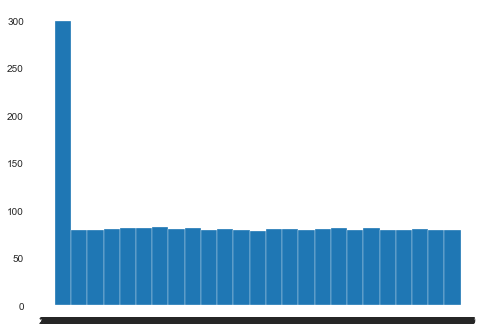

In [59]:
plt.hist(df['ViolentCrimesPerPop'], bins = 25)

numpy.ndarray